In [ ]:
!pip install pysal

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gpd


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pysal as ps
from pysal.lib import weights
from pysal.model import spreg

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [16,8]

In [ ]:
import pandas as pd
import geopandas as gpd

fn=r'/content/DEC_FEB.csv'
data= pd.read_csv(fn)
data.head()

,Unnamed: 0,site_name,pm2_5_calibrated_value,pm10_calibrated_value,humidity,temperature,wind_speed,wind_direction,site_latitude,site_longitude
0,0,"Bahai, Kawempe",31.559011,40.163384,65.929598,26.434675,2.193987,105.570286,0.365309,32.584910
1,1,"Banda, Kampala",37.444037,40.600770,73.956351,24.777456,1.240522,175.419018,0.341674,32.635306
2,2,"Bugolobi, Nakawa",29.760502,39.652234,79.363624,23.044741,1.258507,162.383063,0.307500,32.620600
3,3,"Bukasa, Kira Municipality",30.378402,40.269561,76.965970,23.524836,1.420320,164.112097,0.298750,32.615000
4,4,"Bukoto I, Kawempe",60.024297,73.925000,77.060635,22.959745,1.449072,98.804702,0.351700,32.591000


In [ ]:

data['pm_ration'] = (data.pm2_5_calibrated_value)/ (data.pm10_calibrated_value)

In [ ]:
data.head()

,Unnamed: 0,site_name,pm2_5_calibrated_value,pm10_calibrated_value,humidity,temperature,wind_speed,wind_direction,site_latitude,site_longitude,pm_ration
0,0,"Bahai, Kawempe",31.559011,40.163384,65.929598,26.434675,2.193987,105.570286,0.365309,32.584910,0.785766
1,1,"Banda, Kampala",37.444037,40.600770,73.956351,24.777456,1.240522,175.419018,0.341674,32.635306,0.922249
2,2,"Bugolobi, Nakawa",29.760502,39.652234,79.363624,23.044741,1.258507,162.383063,0.307500,32.620600,0.750538
3,3,"Bukasa, Kira Municipality",30.378402,40.269561,76.965970,23.524836,1.420320,164.112097,0.298750,32.615000,0.754376
4,4,"Bukoto I, Kawempe",60.024297,73.925000,77.060635,22.959745,1.449072,98.804702,0.351700,32.591000,0.811962


<Axes: >

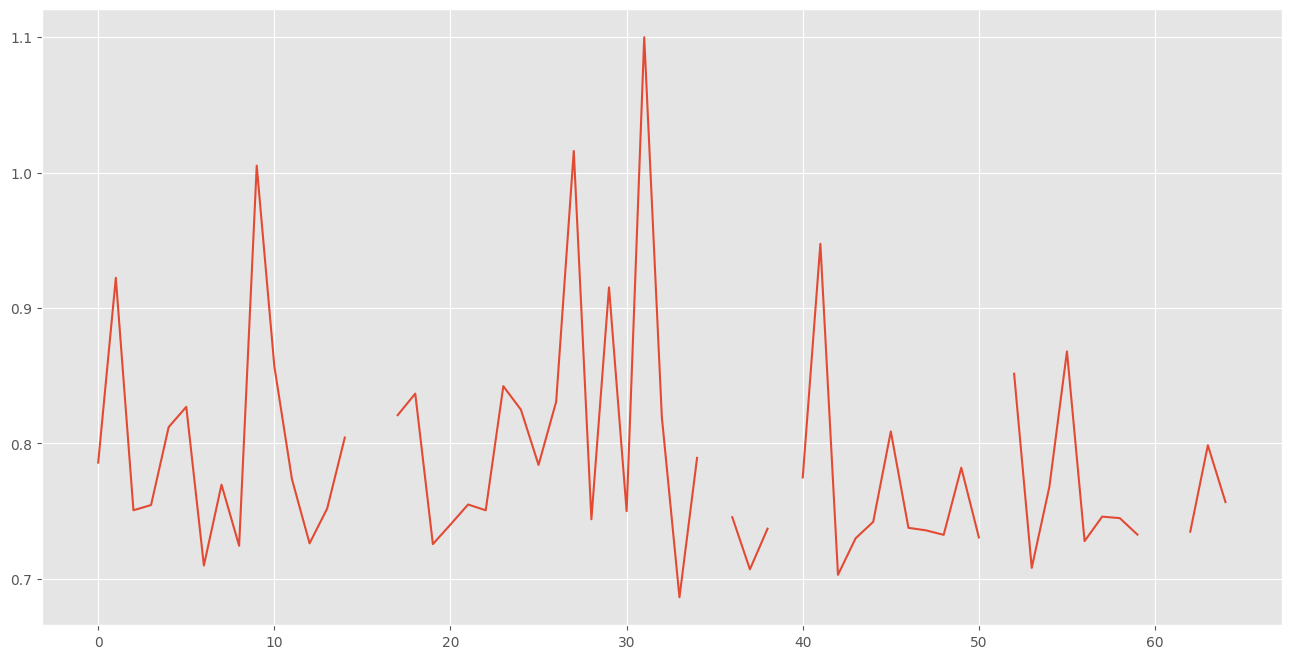

In [ ]:
data['pm_ration'].plot()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the columns to be standardized
columns_to_standardize = ['pm2_5_calibrated_value', 'pm10_calibrated_value', 'humidity', 'temperature', 'wind_speed']

# Create a DataFrame with only the selected columns
selected_columns = data[columns_to_standardize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
standardized_data = scaler.fit_transform(selected_columns)

# Create a DataFrame with standardized data and column names
standardized_df = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized columns with the non-standardized columns
final_df = pd.concat([data[['site_name','wind_direction' ,'site_latitude', 'site_longitude']], standardized_df], axis=1)



In [ ]:
data =final_df

In [ ]:
# Assuming you have loaded your spatial data into data_geo
geometry = gpd.points_from_xy(data['site_longitude'], data['site_latitude'])
geo_df_kma= gpd.GeoDataFrame(data, geometry=geometry)


In [ ]:
geo_df_kma.head()

,site_name,wind_direction,site_latitude,site_longitude,pm2_5_calibrated_value,pm10_calibrated_value,humidity,temperature,wind_speed,geometry
0,"Bahai, Kawempe",105.570286,0.365309,32.584910,-0.822557,-0.742026,-3.109619,3.059933,2.762474,POINT (32.58491 0.36531)
1,"Banda, Kampala",175.419018,0.341674,32.635306,-0.378028,-0.713287,-0.760129,1.363213,0.425772,POINT (32.63531 0.34167)
2,"Bugolobi, Nakawa",162.383063,0.307500,32.620600,-0.958408,-0.775611,0.822619,-0.410800,0.469847,POINT (32.62060 0.30750)
3,"Bukasa, Kira Municipality",164.112097,0.298750,32.615000,-0.911735,-0.735049,0.120808,0.080737,0.866409,POINT (32.61500 0.29875)
4,"Bukoto I, Kawempe",98.804702,0.351700,32.591000,1.327583,1.476297,0.148517,-0.497822,0.936873,POINT (32.59100 0.35170)


In [ ]:
geo_df = gpd.read_file('https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_UGA_4.json.zip')

In [ ]:
jinja=geo_df[(geo_df.NAME_1=='Kampala')|(geo_df.NAME_1=='Wakiso')|(geo_df.NAME_1=='Mukwano')]

In [ ]:
jinja =jinja[['NAME_1','NAME_3','NAME_4','geometry']]

In [ ]:
jinja.head()

,NAME_1,NAME_3,NAME_4,geometry
1390,Kampala,CentralDivision,Bukesa,"MULTIPOLYGON (((32.56450 0.33050, 32.56490 0.3..."
1391,Kampala,CentralDivision,CivicCentre,"MULTIPOLYGON (((32.59270 0.31940, 32.59400 0.3..."
1392,Kampala,CentralDivision,IndustrialArea,"MULTIPOLYGON (((32.59400 0.31750, 32.59260 0.3..."
1393,Kampala,CentralDivision,Kagugube,"MULTIPOLYGON (((32.56870 0.32470, 32.56490 0.3..."
1394,Kampala,CentralDivision,KamwokyaI,"MULTIPOLYGON (((32.58650 0.34290, 32.58960 0.3..."


<Axes: >

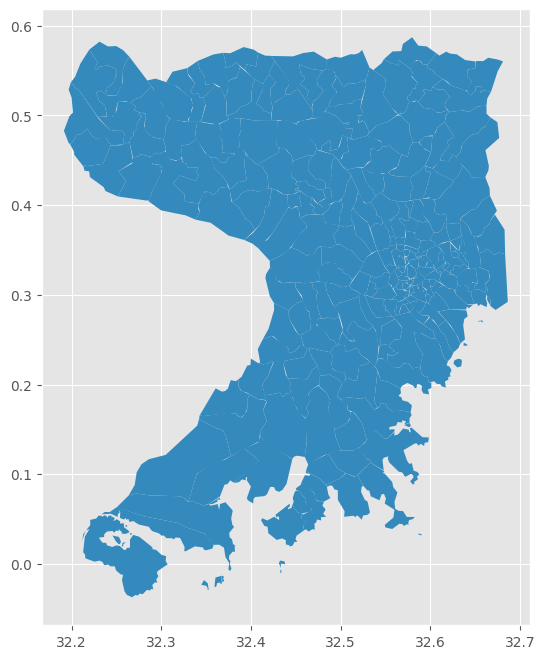

In [ ]:
jinja.plot()

In [ ]:
merged = gpd.sjoin(jinja,geo_df_kma, how='left', op='contains', lsuffix='_polygon', rsuffix='_point')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-135-18297c467126>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged = gpd.sjoin(jinja,geo_df_kma, how='left', op='contains', lsuffix='_polygon', rsuffix='_point')


In [ ]:
merged.head()

,NAME_1,NAME_3,NAME_4,geometry,index__point,site_name,wind_direction,site_latitude,site_longitude,pm2_5_calibrated_value,pm10_calibrated_value,humidity,temperature,wind_speed
1390,Kampala,CentralDivision,Bukesa,"MULTIPOLYGON (((32.56450 0.33050, 32.56490 0.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1391,Kampala,CentralDivision,CivicCentre,"MULTIPOLYGON (((32.59270 0.31940, 32.59400 0.3...",11.0,"Civic Centre, Kampala Central",212.829173,0.314,32.59,0.858409,1.19043,0.771109,0.077201,-0.717259
1392,Kampala,CentralDivision,IndustrialArea,"MULTIPOLYGON (((32.59400 0.31750, 32.59260 0.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393,Kampala,CentralDivision,Kagugube,"MULTIPOLYGON (((32.56870 0.32470, 32.56490 0.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1394,Kampala,CentralDivision,KamwokyaI,"MULTIPOLYGON (((32.58650 0.34290, 32.58960 0.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

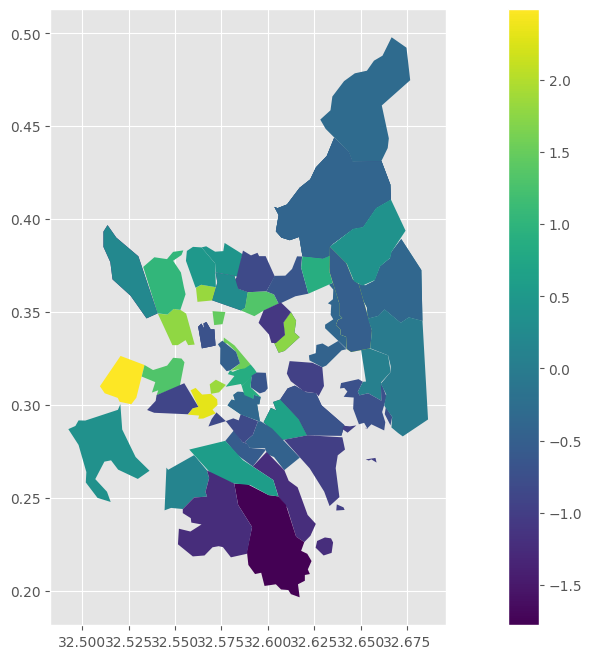

In [ ]:
merged.plot(column='pm2_5_calibrated_value', legend=True)

In [ ]:
#merged.plot(column='pm_ration', legend=True)
#plt.title('PM sources')

In [ ]:
#merged.plot(column='pm2_5_calibrated_value', legend=True)

In [ ]:
merged.NAME_3.unique()

array(['CentralDivision', 'KawempeDivision', 'Makindye', 'NakawaDivision',
       'RubagaDivision', 'Kakiri', 'Kasanje', 'Katabi-Entebbe',
       'Masulita', 'Namayumba', 'Nsangi', 'Ssisa', 'Wakiso', 'WakisoTc',
       'DivisionA', 'DivisionB', 'Busukuma', 'Gombe', 'Kira', 'Nabweru',
       'Nangabo', 'Ssabagabo-Makindye'], dtype=object)

In [ ]:
merged =merged.dropna(subset='temperature')

In [ ]:
merged =merged.dropna(subset='wind_direction')

In [ ]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 56 entries, 1391 to 5293
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NAME_1                  56 non-null     object  
 1   NAME_3                  56 non-null     object  
 2   NAME_4                  56 non-null     object  
 3   geometry                56 non-null     geometry
 4   index__point            56 non-null     float64 
 5   site_name               56 non-null     object  
 6   wind_direction          56 non-null     float64 
 7   site_latitude           56 non-null     float64 
 8   site_longitude          56 non-null     float64 
 9   pm2_5_calibrated_value  56 non-null     float64 
 10  pm10_calibrated_value   56 non-null     float64 
 11  humidity                56 non-null     float64 
 12  temperature             56 non-null     float64 
 13  wind_speed              56 non-null     float64 
dtypes: float64(9), 

In [ ]:
import pandas as pd
import geopandas as gpd
from pysal.model import spreg
from pysal.lib import weights
import numpy as np

# Fit the GWR model
y = merged['pm2_5_calibrated_value'].values.reshape((-1,1)) # reshape is needed to have column array
y.shape

#X = merged[['humidity', 'temperature', 'wind_speed', 'wind_direction', 'site_latitude', 'site_longitude']].values
X = merged[['wind_speed','temperature', 'humidity','wind_direction']].values
X.shape

(56, 4)

In [ ]:
v = merged['site_longitude']
u = merged['site_latitude']
coords = list(zip(u,v))

In [ ]:
from mgwr.sel_bw import Sel_BW
gwr_selector = Sel_BW(coords, y, X)
gwr_bw = gwr_selector.search()

In [ ]:
print('GWR bandwidth =', gwr_bw)

GWR bandwidth = 54.0


In [ ]:
from mgwr.gwr import GWR, MGWR
gwr_results = GWR(coords, y, X, gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  56
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             35.177
Log-likelihood:                                                     -66.442
AIC:                                                                142.884
AICc:                                                               146.598
BIC:                                                               -170.116
R2:                                                                   0.255
Adj. R2:                                                              0.197

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

<ipython-input-149-740b98d9e365>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged.centroid.plot(ax=ax)


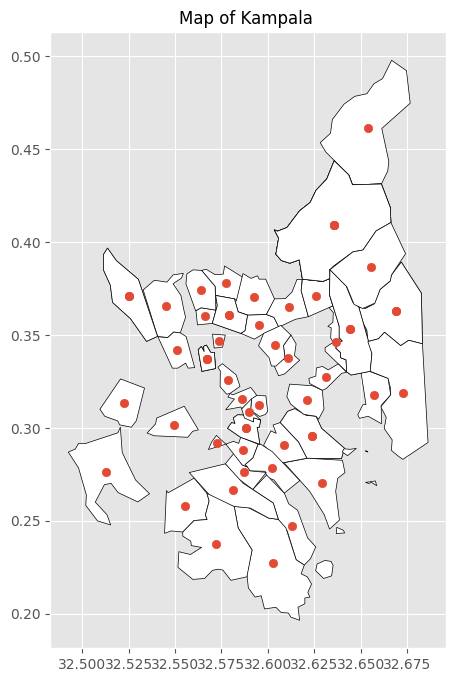

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(color = 'white', edgecolor = 'black', ax = ax)
merged.centroid.plot(ax=ax)
ax.set_title('Map of Kampala ', fontsize=12)
ax.axis()
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# As reference, here is the (average) R2, AIC, and AICc
print('Mean R2 =', gwr_results.R2)
print('AIC =', gwr_results.aic)
print('AICc =', gwr_results.aicc)

Mean R2 = 0.3040209636447594
AIC = 147.30235284098984
AICc = 151.30459575868008


In [ ]:
# Add R2 to GeoDataframe
merged['gwr_R2'] = gwr_results.localR2

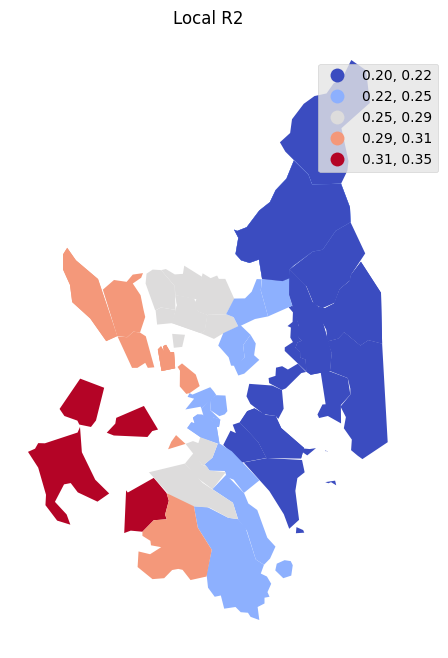

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='gwr_R2', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=ax)
ax.set_title('Local R2', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
merged['gwr_intercept'] = gwr_results.params[:,0]
merged['gwr_wind_speed']        = gwr_results.params[:,1]
merged['gwr_temperature']        = gwr_results.params[:,2]
merged['gwr_humidity']     = gwr_results.params[:,3]
merged['gwr_wind_direction']     = gwr_results.params[:,4]

In [ ]:
merged[["NAME_1", "NAME_3","NAME_4", "gwr_humidity","gwr_wind_speed"]].sort_values(by="gwr_wind_speed", ascending=True)


,NAME_1,NAME_3,NAME_4,gwr_humidity,gwr_wind_speed
5206,Wakiso,Nsangi,Kasenge,-0.120051,-0.590498
1473,Kampala,RubagaDivision,Busega,-0.104526,-0.587434
1485,Kampala,RubagaDivision,Rubaga,-0.103072,-0.545662
5288,Wakiso,Ssabagabo-Makindye,Bunamwaya,-0.129736,-0.522949
1438,Kampala,Makindye,KibuyeIi,-0.095693,-0.502926
5277,Wakiso,Nabweru,Nansana,-0.139591,-0.498712
1475,Kampala,RubagaDivision,Kasubi,-0.118265,-0.497064
5293,Wakiso,Ssabagabo-Makindye,Ndejje,-0.159706,-0.495445
1427,Kampala,KawempeDivision,University(Makerere),-0.109535,-0.481631
1427,Kampala,KawempeDivision,University(Makerere),-0.109608,-0.481179


In [ ]:
# Filter t-values: standard alpha = 0.05
gwr_filtered_t = gwr_results.filter_tvals(alpha = 0.05)

In [ ]:
pd.DataFrame(gwr_filtered_t)

,0,1,2,3,4
0,0.000000,0.000000,0.0,0.0,0.000000
1,2.174794,0.000000,0.0,0.0,-2.302163
2,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.000000
5,0.000000,0.000000,0.0,0.0,0.000000
6,0.000000,0.000000,0.0,0.0,0.000000
7,0.000000,0.000000,0.0,0.0,0.000000
8,0.000000,0.000000,0.0,0.0,0.000000
9,2.216561,0.000000,0.0,0.0,-2.317675


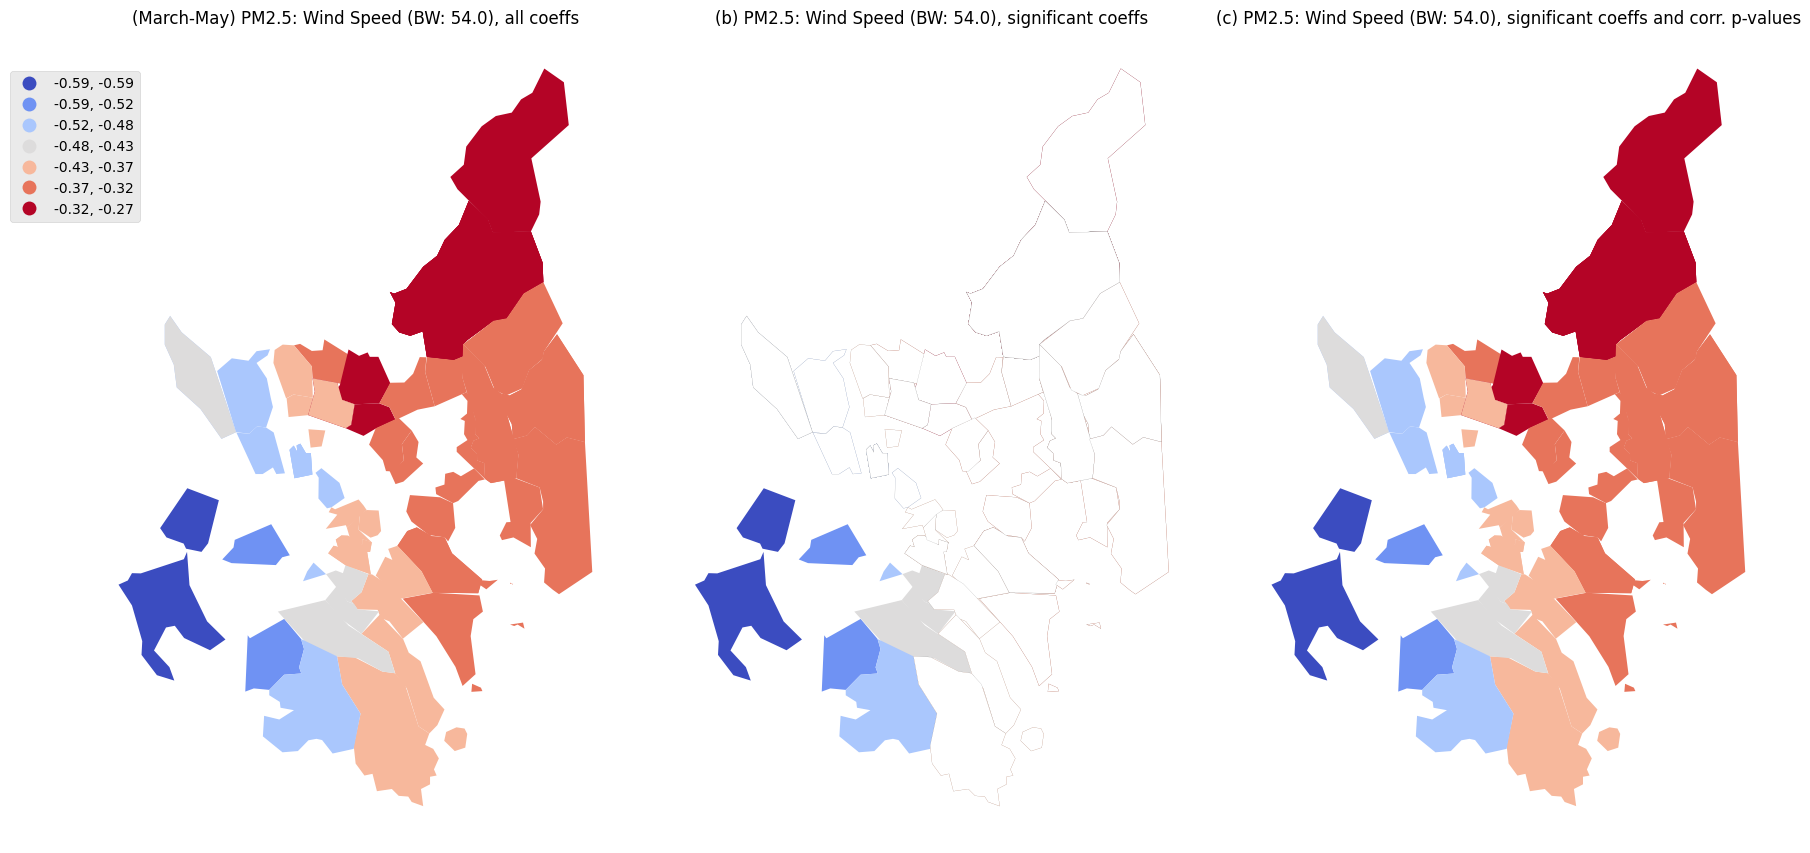

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,10))

merged.plot(column='gwr_wind_speed', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=7, legend=True, legend_kwds={'bbox_to_anchor':(0.10, 0.96)},  ax=axes[0])

merged.plot(column='gwr_wind_speed', cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=7, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.6)},  ax=axes[1])
merged[gwr_filtered_t[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])


merged.plot(column='gwr_wind_speed', cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=7, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=axes[2])
#gdf[gwr_filtered_tc[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(March-May) PM2.5: Wind Speed (BW: ' + str(gwr_bw) +'), all coeffs', fontsize=12)
axes[1].set_title('(b) PM2.5: Wind Speed (BW: ' + str(gwr_bw) +'), significant coeffs',     fontsize=12)
axes[2].set_title('(c) PM2.5: Wind Speed (BW: ' + str(gwr_bw) +'), significant coeffs and corr. p-values',     fontsize=12)
plt.show()

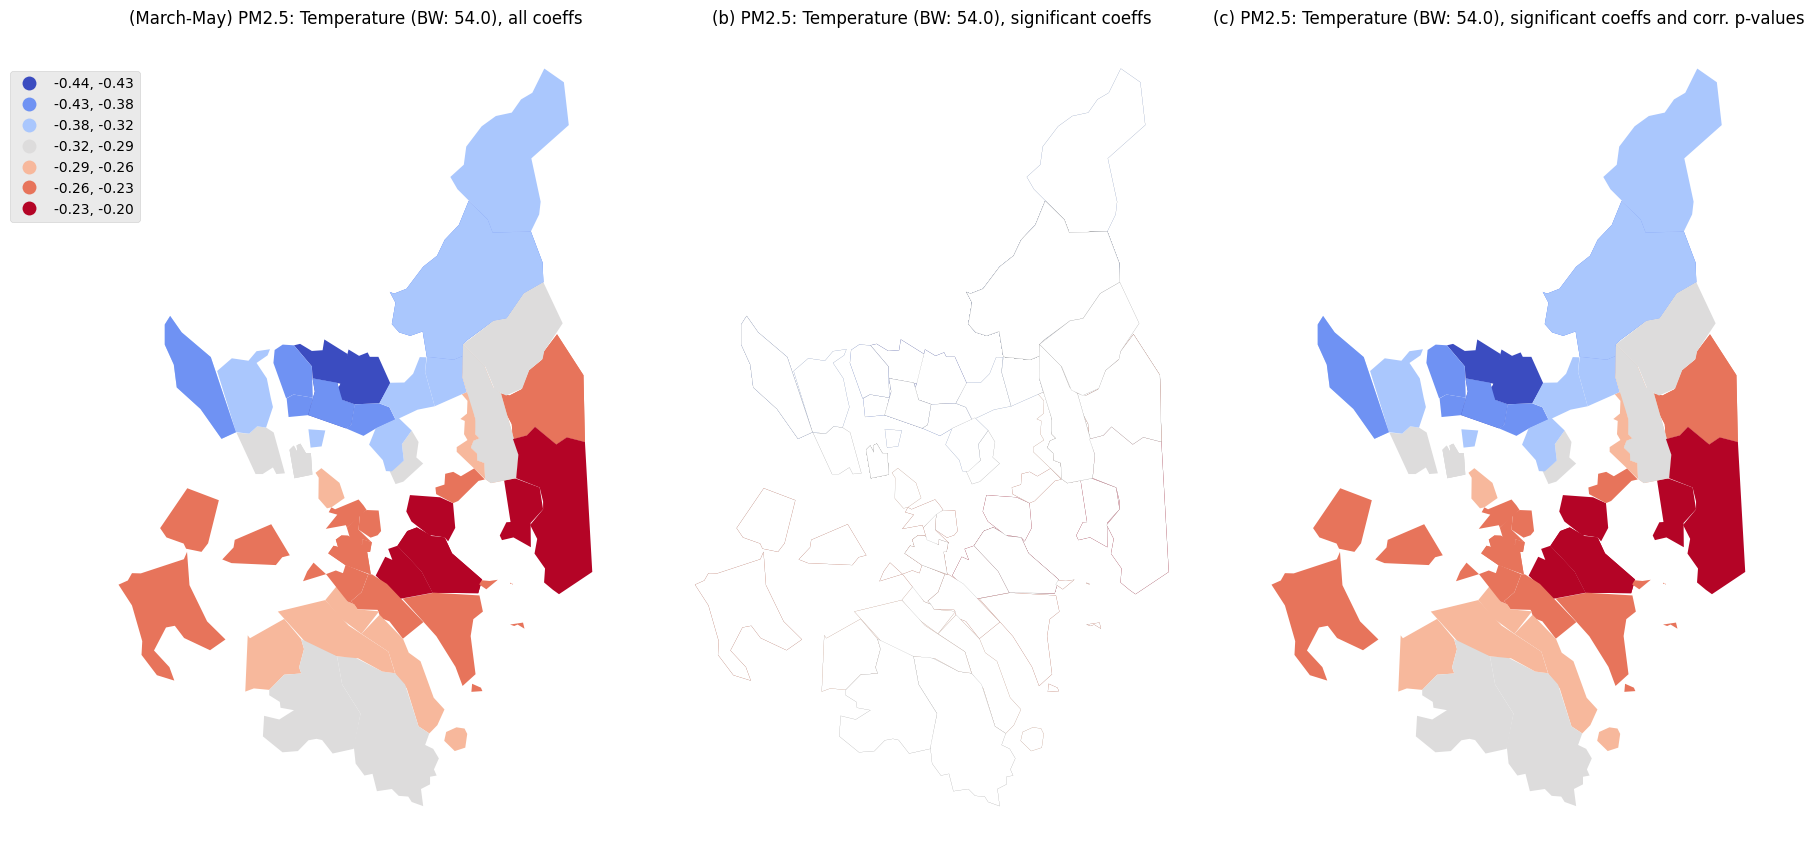

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,10))

merged.plot(column='gwr_temperature', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=7, legend=True, legend_kwds={'bbox_to_anchor':(0.10, 0.96)},  ax=axes[0])

merged.plot(column='gwr_temperature', cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=7, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.6)},  ax=axes[1])
merged[gwr_filtered_t[:,2] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])


merged.plot(column='gwr_temperature', cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=7, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=axes[2])
#gdf[gwr_filtered_tc[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(March-May) PM2.5: Temperature (BW: ' + str(gwr_bw) +'), all coeffs', fontsize=12)
axes[1].set_title('(b) PM2.5: Temperature (BW: ' + str(gwr_bw) +'), significant coeffs',     fontsize=12)
axes[2].set_title('(c) PM2.5: Temperature (BW: ' + str(gwr_bw) +'), significant coeffs and corr. p-values',     fontsize=12)
plt.show()

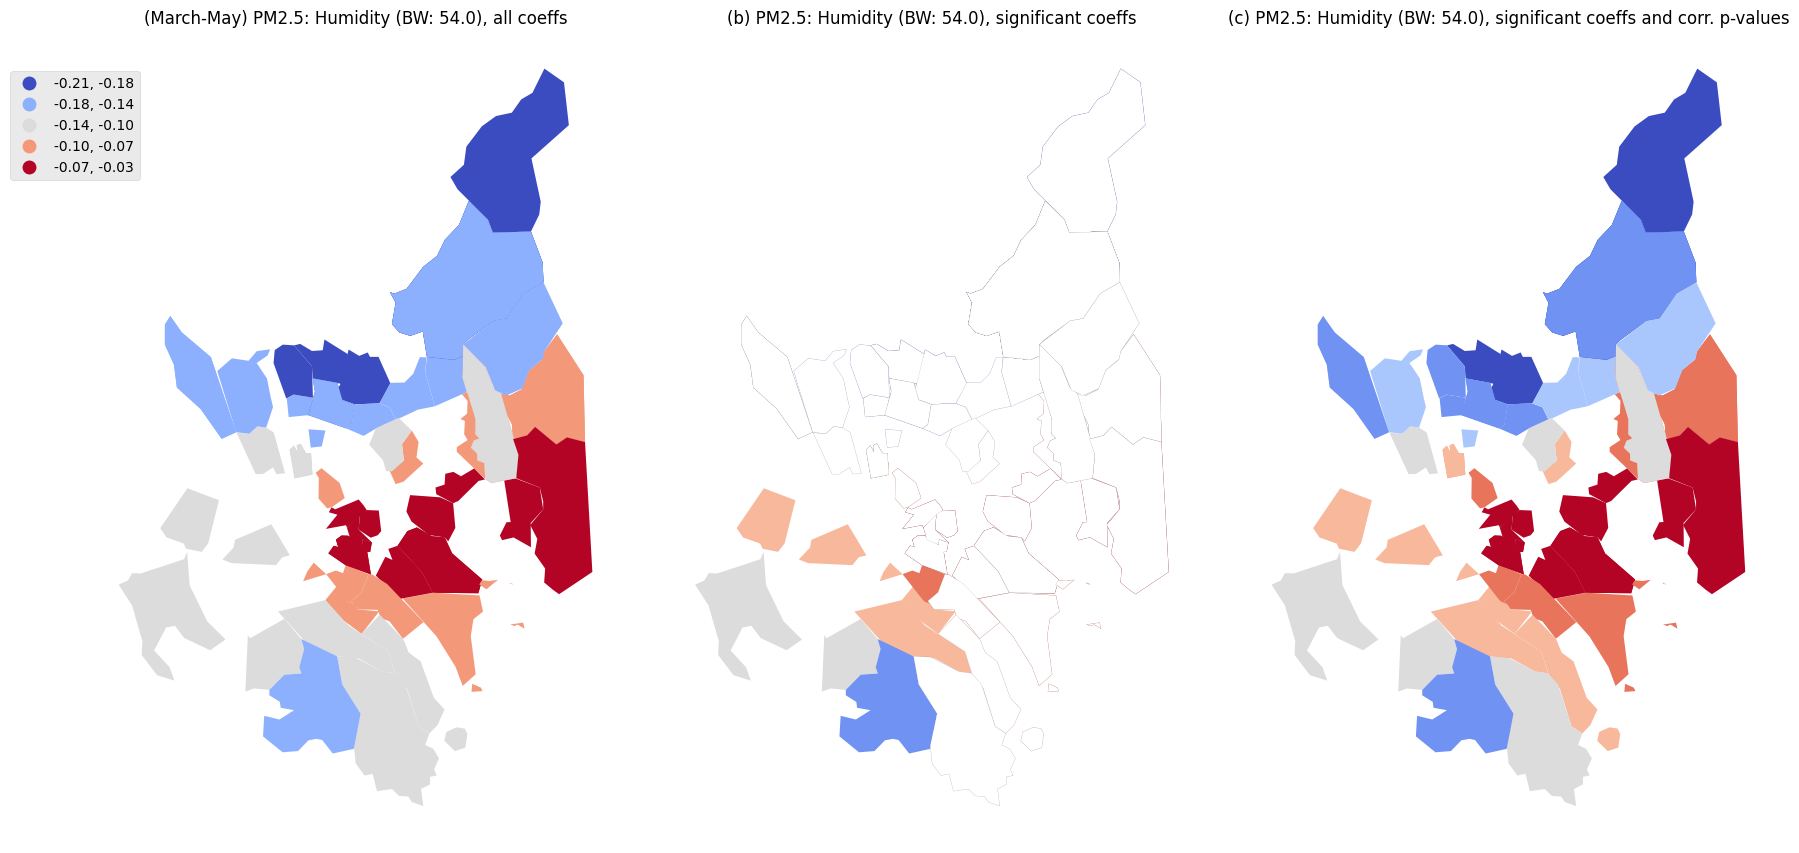

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,10))

merged.plot(column='gwr_humidity', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(0.10, 0.96)},  ax=axes[0])

merged.plot(column='gwr_humidity', cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=7, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.6)},  ax=axes[1])
merged[gwr_filtered_t[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])


merged.plot(column='gwr_humidity', cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=7, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=axes[2])
#gdf[gwr_filtered_tc[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(March-May) PM2.5: Humidity (BW: ' + str(gwr_bw) +'), all coeffs', fontsize=12)
axes[1].set_title('(b) PM2.5: Humidity (BW: ' + str(gwr_bw) +'), significant coeffs',     fontsize=12)
axes[2].set_title('(c) PM2.5: Humidity (BW: ' + str(gwr_bw) +'), significant coeffs and corr. p-values',     fontsize=12)
plt.show()

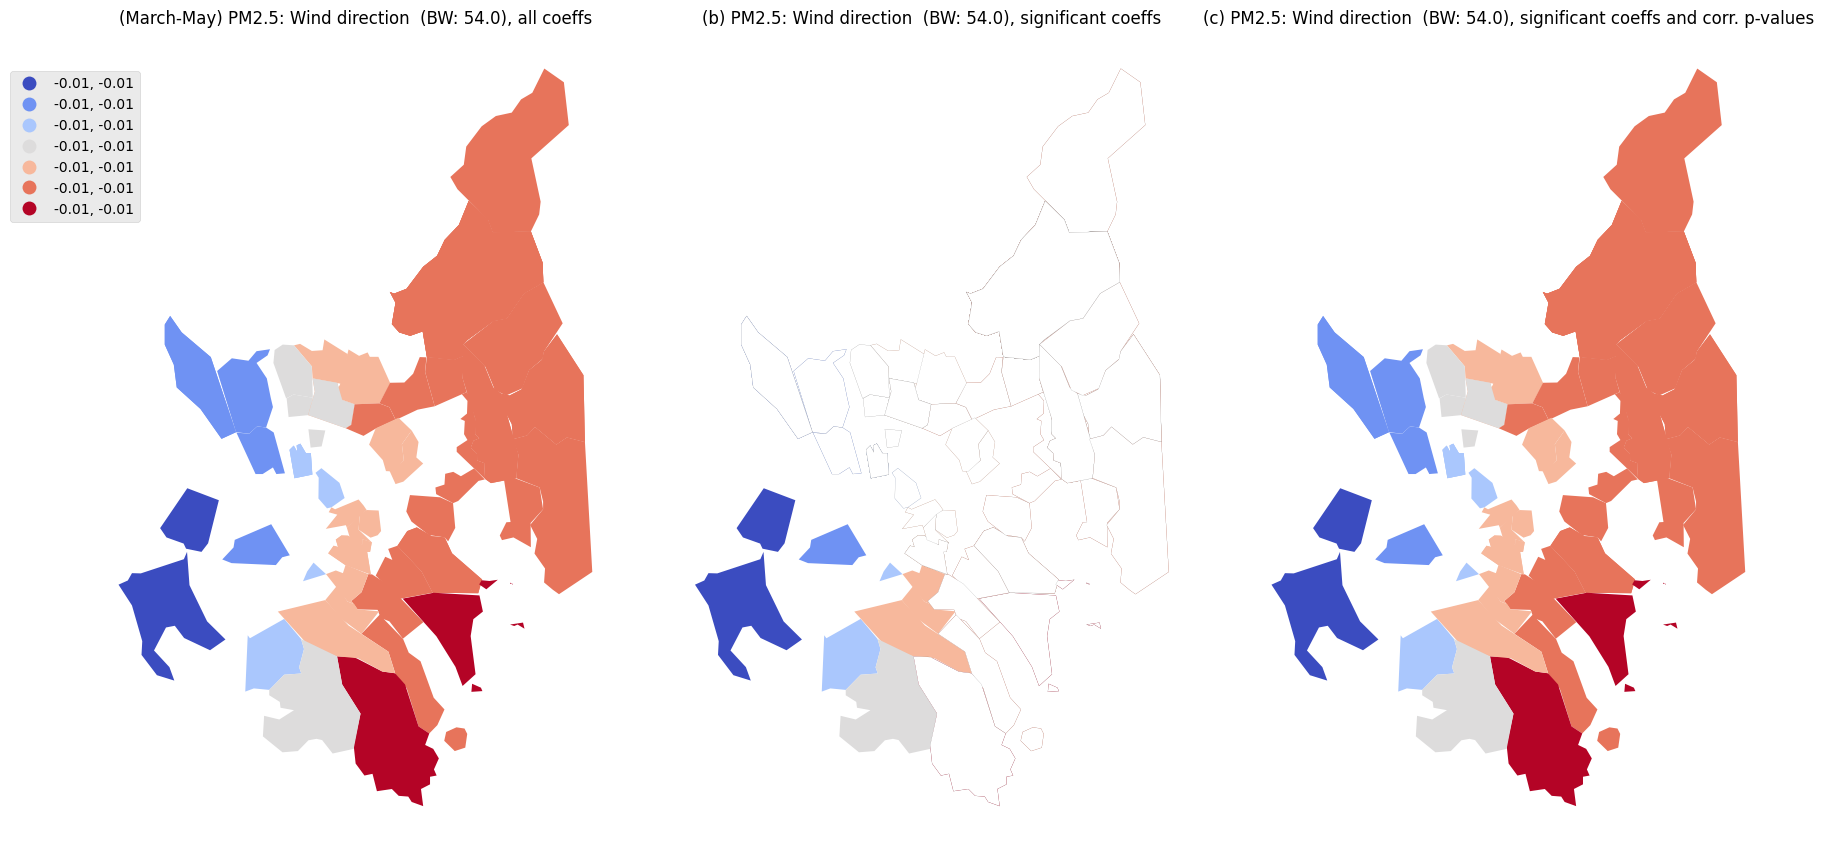

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,10))

merged.plot(column='gwr_wind_direction', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=7, legend=True, legend_kwds={'bbox_to_anchor':(0.10, 0.96)},  ax=axes[0])

merged.plot(column='gwr_wind_direction', cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=7, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.6)},  ax=axes[1])
merged[gwr_filtered_t[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[1])


merged.plot(column='gwr_wind_direction', cmap = 'coolwarm', linewidth=0.05, scheme = 'FisherJenks', k=7, legend=False, legend_kwds={'bbox_to_anchor':(1.10, 0.96)},  ax=axes[2])
#merged[gwr_filtered_tc[:,1] == 0].plot(color='white', linewidth=0.05, edgecolor='black', ax=axes[2])

plt.tight_layout()

axes[0].axis("off")
axes[1].axis("off")
axes[2].axis("off")

axes[0].set_title('(March-May) PM2.5: Wind direction  (BW: ' + str(gwr_bw) +'), all coeffs', fontsize=12)
axes[1].set_title('(b) PM2.5: Wind direction  (BW: ' + str(gwr_bw) +'), significant coeffs',     fontsize=12)
axes[2].set_title('(c) PM2.5: Wind direction  (BW: ' + str(gwr_bw) +'), significant coeffs and corr. p-values',     fontsize=12)
plt.show()

In [ ]:
gwr_p_values_stationarity = gwr_results.spatial_variability(gwr_selector, 50)

In [ ]:
gwr_p_values_stationarity

array([0.48, 0.6 , 0.84, 0.94, 0.46])

In [ ]:
LCC, VIF, CN, VDP = gwr_results.local_collinearity()

In [ ]:
pd.DataFrame(VIF)

,0,1,2,3
0,4.113178,3.802942,3.180432,3.168672
1,4.726161,4.553309,3.316183,3.310331
2,9.887250,8.206299,4.477534,5.660818
3,11.889159,9.651019,5.206289,6.602110
4,10.109762,8.633314,4.651569,5.626207
5,11.564585,9.013024,4.953050,6.681703
6,10.979805,8.515358,4.716566,6.444593
7,9.961395,8.073198,4.441732,5.789658
8,8.741254,7.221043,4.198145,5.294952
9,5.415628,5.166876,3.528608,3.591085


In [ ]:
merged['gwr_CN'] = CN

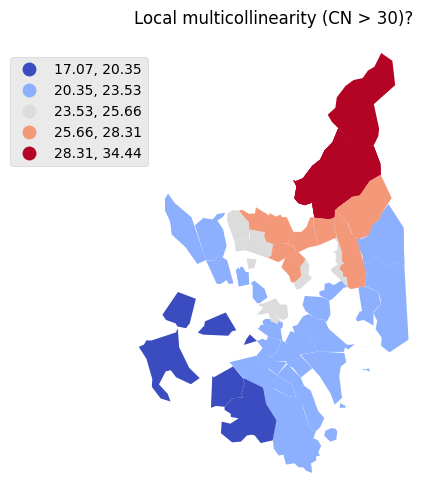

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
merged.plot(column='gwr_CN', cmap = 'coolwarm', linewidth=0.01, scheme = 'FisherJenks', k=5, legend=True, legend_kwds={'bbox_to_anchor':(0.10, 0.96)},  ax=ax)
ax.set_title('Local multicollinearity (CN > 30)?', fontsize=12)
ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
data1 = data[data.site_name=='Kireka, Kira Municipality']
data1

,site_name,wind_direction,site_latitude,site_longitude,pm2_5_calibrated_value,pm10_calibrated_value,humidity,temperature,wind_speed
23,"Kireka, Kira Municipality",169.517258,0.347014,32.64936,1.895007,1.887981,0.801717,-0.792857,-0.236272
